<img src="https://upload.wikimedia.org/wikipedia/en/5/5e/Munster_Technological_University_Logo%2C_2021.jpg">



> Orlando Jr.



> Data Science and Analytics - MTU.



> Mr. Aengus Daly



##Import Libs and install packs

In [ ]:
!pip install geopy
!pip install geopandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
from geopandas.tools import geocode
import time
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import ArcGIS
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

# Send a request to the URL
url = "https://www.daft.ie/property-for-sale/cork-city"
response = requests.get(url)
array_response = []
#for a in range(10):
 # url = 
  #print (a)



##Main Function for webscraping Daft.ie

In [ ]:
address = []
price = []
beds = []
baths = []
area = []

#Defining the opencodezscraping function
def scrap_daft(webpage, page_number):
   next_page = webpage + str(page_number)
   response= requests.get(str(next_page))
   soup = BeautifulSoup(response.content,"html.parser")
   soup_address= soup.findAll('h2', class_="TitleBlock__Address-sc-1avkvav-8 dzihyY")
   soup_price= soup.findAll('h3', class_="TitleBlock__StyledCustomHeading-sc-1avkvav-5 blbeVq")
   soup_beds= soup.findAll( attrs={'data-testid': 'beds'},class_="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur")
   soup_baths= soup.findAll( attrs={'data-testid': 'baths'},class_="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur")
   soup_area= soup.findAll( attrs={'data-testid':'floor-area'},class_="TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur")
   
#type(soup_beds)
   
   for x in range(len(soup_address)):
      
      address.append(soup_address[x].text.strip())
      price.append(soup_price[x].text.strip())
   for y in range(len(soup_beds)):
     beds.append(soup_beds[y].text.strip())
   for z in range(len(soup_baths)):
     baths.append(soup_baths[z].text.strip())  
   for w in range(len(soup_area)):
     area.append(soup_area[w].text.strip())  
   
   #Generating the next page url 1000 is the limit of houses
   if page_number < 1000:
      page_number = page_number + 20
      scrap_daft(webpage, page_number)
   
   #calling the function
scrap_daft('https://www.daft.ie/property-for-sale/cork-city?pageSize=20&propertyType=houses&propertyType=detached-houses&propertyType=semi-detached-houses&propertyType=terraced-houses&propertyType=end-of-terrace-houses&propertyType=townhouses&propertyType=studio-apartments&propertyType=duplexes&propertyType=bungalows&propertyType=apartments&numBaths_from=1&floorSize_from=10&from=', 0)


##Register of Date and Time of data collection

In [ ]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d/%m/%Y")
print("Current Time =", current_time)
print("Current Date =", current_date)

Current Time = 22:11:18
Current Date = 02/03/2023


##Creating a Data Set with the houses for sale in Cork - Updated Fresh Data!

In [ ]:
data = { 'Address':address, 'Price':price, 'Beds': beds, 'Baths': baths, 'Area': area}
df = pd.DataFrame(data, columns = ['Address','Price', 'Beds','Baths','Area'])

In [ ]:
df_raw = pd.DataFrame(data, columns = ['Address','Price', 'Beds','Baths','Area'])

In [ ]:
df_raw

,Address,Price,Beds,Baths,Area
0,"42 Grattan Street, Cork City, Co. Cork","€265,000",4 Bed,2 Bath,104 m²
1,"1 Old Friary Place, Shandon Street, Cork City,...","€275,000",2 Bed,2 Bath,70 m²
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork","€225,000",3 Bed,1 Bath,75 m²
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork","€580,000",5 Bed,3 Bath,282 m²
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...","€290,000",3 Bed,1 Bath,76 m²
...,...,...,...,...,...
433,"Well Road, Douglas, Douglas, Co. Cork","€995,000",4 Bed,4 Bath,232 m²
434,"House Type A, Willsford Castletreasure, Willsf...",Price on Application,4 Bed,3 Bath,180 m²
435,"House Type E, Earls Well, Earls Well, Waterfal...",Price on Application,4 Bed,4 Bath,216 m²
436,"House Type G , Earls Well, Earls Well, Waterfa...",Price on Application,4 Bed,4 Bath,261 m²


In [ ]:
df_raw.to_csv('df_raw.csv', index=False)

## RUN FROM THIS PART TO AVOID RE_SCRAPING  

###Data set now is public, with the link that I created bellow can be accessed from any application

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/orlandojrps/stream/main/df_raw.csv")

##First look into the DataSet. (Pre)EDA

In [ ]:
df.head(100)

,Address,Price,Beds,Baths,Area
0,"42 Grattan Street, Cork City, Co. Cork","€265,000",4 Bed,2 Bath,104 m²
1,"1 Old Friary Place, Shandon Street, Cork City,...","€275,000",2 Bed,2 Bath,70 m²
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork","€225,000",3 Bed,1 Bath,75 m²
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork","€580,000",5 Bed,3 Bath,282 m²
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...","€290,000",3 Bed,1 Bath,76 m²
...,...,...,...,...,...
95,"The Laurels, Laurel Bank, Model Farm Road, Co....",Price on Application,6 Bed,5 Bath,319 m²
96,"3 Millstream Row, Cork City, Co. Cork","€215,000",2 Bed,1 Bath,59 m²
97,"27 Fort Hill, Moneygurney, Douglas, Co. Cork","€240,000",2 Bed,2 Bath,70 m²
98,"12 Sharman Avenue, Crawford Gate, Blackrock, C...","€425,000",4 Bed,3 Bath,119 m²


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  438 non-null    object
 1   Price    438 non-null    object
 2   Beds     438 non-null    object
 3   Baths    438 non-null    object
 4   Area     438 non-null    object
dtypes: object(5)
memory usage: 17.2+ KB


In [ ]:
df.Baths.unique()

array(['2 Bath', '1 Bath', '3 Bath', '4 Bath', '5 Bath'], dtype=object)

##Some pre-work in Features

In [ ]:
# Discretize Beds
df.loc[df.Beds == '1 Bed', 'Beds' ] = 1
df.loc[df.Beds == '2 Bed', 'Beds' ] = 2
df.loc[df.Beds == '3 Bed', 'Beds' ] = 3
df.loc[df.Beds == '4 Bed', 'Beds' ] = 4
df.loc[df.Beds == '5 Bed', 'Beds' ] = 5
df.loc[df.Beds == '6 Bed', 'Beds' ] = 6
df.loc[df.Beds == '7 Bed', 'Beds' ] = 7
df.Beds = df.Beds.astype('int')

In [ ]:
# Discretize Baths
df.loc[df.Baths == '1 Bath', 'Baths' ] = 1
df.loc[df.Baths == '2 Bath', 'Baths' ] = 2
df.loc[df.Baths == '3 Bath', 'Baths' ] = 3
df.loc[df.Baths == '4 Bath', 'Baths' ] = 4
df.loc[df.Baths == '5 Bath', 'Baths' ] = 5
df.Baths = df.Baths.astype('int')

In [ ]:
# Format Price
def convert_price_to_int(df):
    df['Price'] = df['Price'].str.replace('€', '') # remove the Euro symbol
    df['Price'] = df['Price'].str.replace(',', '') # remove commas
    #df['Price'] = df['Price'].astype('int') # convert to integer
    return df
df_clean = convert_price_to_int(df)


In [ ]:
df_clean.Price.unique()

array(['265000', '275000', '225000', '580000', '290000', '380000',
       '750000', '150000', '745000', '280000', '325000', '480000',
       '230000', '350000', '295000', '310000', '495000', '245000',
       '159000', '375000', '445000', '595000', '525000', '625000',
       'Final Phase Available Now', 'From 470000', '249000', '725000',
       '370000', '395000', '440000', '675000', '195000', '250000',
       '450000', '425000', '160000', '360000', '175000', '130000',
       '485000', '330000', '305000', 'AMV: 120000', '235000', '320000',
       '240000', '285000', '239000', '345000', '185000', '895000',
       '180000', '385000', 'Price on Application', '215000', '449000',
       '75000', '365000', '210000', '165000', '229000', '220000',
       '535000', '190000', 'AMV: 160000', 'AMV: 185000', '335000',
       '200000', '170000', '455000', '600000', '475000', '270000',
       '585000', '279000', '510000', '355000', '540000', '465000',
       '420000', 'AMV: 150000', '390000', 'AMV: 17

In [ ]:
def drop_non_numeric_prices(df):
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # convert Price column to numeric
    df = df.dropna(subset=['Price']) # drop rows where Price is NaN
    df = df.astype({'Price': 'int'}) # convert Price to integer
    return df
df_clean = drop_non_numeric_prices(df_clean)

In [ ]:
df_clean.Price.unique()

array([ 265000,  275000,  225000,  580000,  290000,  380000,  750000,
        150000,  745000,  280000,  325000,  480000,  230000,  350000,
        295000,  310000,  495000,  245000,  159000,  375000,  445000,
        595000,  525000,  625000,  249000,  725000,  370000,  395000,
        440000,  675000,  195000,  250000,  450000,  425000,  160000,
        360000,  175000,  130000,  485000,  330000,  305000,  235000,
        320000,  240000,  285000,  239000,  345000,  185000,  895000,
        180000,  385000,  215000,  449000,   75000,  365000,  210000,
        165000,  229000,  220000,  535000,  190000,  335000,  200000,
        170000,  455000,  600000,  475000,  270000,  585000,  279000,
        510000,  355000,  540000,  465000,  420000,  390000,  825000,
        179000,  410000,  550000,  197000,  329000,  575000,  429000,
        650000,  340000,  685000,  545000,  520000,  260000,  155000,
        145000,  319000,  830000,  255000,  189000,  100000,  635000,
        300000, 1250

In [ ]:
df_clean

,Address,Price,Beds,Baths,Area
0,"42 Grattan Street, Cork City, Co. Cork",265000,4,2,104 m²
1,"1 Old Friary Place, Shandon Street, Cork City,...",275000,2,2,70 m²
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",225000,3,1,75 m²
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",580000,5,3,282 m²
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",290000,3,1,76 m²
...,...,...,...,...,...
428,"20 The Garnish, Lancaster Gate, Western Road, ...",400000,2,2,72 m²
430,"1 Dryden Place, Ballinlough, Co. Cork",315000,4,2,134 m²
431,"207 Ashbrook, Victoria Cross, Wilton, Co. Cork",255000,3,1,56 m²
432,"Opera Lane Residences, Cork City, Cork City Ce...",465000,2,2,92 m²


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 446
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  432 non-null    object
 1   Price    432 non-null    int64 
 2   Beds     432 non-null    int64 
 3   Baths    432 non-null    int64 
 4   Area     432 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.2+ KB


##The area is one of the most important features, so we are converting to numeric

In [ ]:
def convert_area_to_int(df):
    df['Area'] = df['Area'].str.replace(' m²', '') # remove the 'm²' suffix
    df['Area'] = df['Area'].astype(int) # convert to integer
    return df
df_clean = convert_area_to_int(df_clean)

In [ ]:
df_clean

,Address,Price,Beds,Baths,Area
0,"42 Grattan Street, Cork City, Co. Cork",265000,4,2,104
1,"1 Old Friary Place, Shandon Street, Cork City,...",275000,2,2,70
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",225000,3,1,75
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",580000,5,3,282
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",290000,3,1,76
...,...,...,...,...,...
428,"20 The Garnish, Lancaster Gate, Western Road, ...",400000,2,2,72
430,"1 Dryden Place, Ballinlough, Co. Cork",315000,4,2,134
431,"207 Ashbrook, Victoria Cross, Wilton, Co. Cork",255000,3,1,56
432,"Opera Lane Residences, Cork City, Cork City Ce...",465000,2,2,92


In [ ]:
df_clean.to_csv('df_clean.csv', index=False)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 433
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  419 non-null    object
 1   Price    419 non-null    int64 
 2   Beds     419 non-null    int64 
 3   Baths    419 non-null    int64 
 4   Area     419 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.6+ KB


## Now with the dataset clean and transformed lets convert the feature Adress into some usefull data, to do it so lets use the function geocode from GEOPANDAS LIB. Ref.:https://geopandas.org/en/stable/

In [ ]:
# Geocode addresses with arcgis as the 'your user_agent application'
geocoded_try = geocode(df_clean["Address"], provider="arcgis", timeout=60)


##Creating a BKP for the raw data

In [ ]:
geocoded_try.to_csv('https://raw.githubusercontent.com/orlandojrps/stream/main/geocoded_try.csv', index=False)

In [ ]:
df_locations = geocoded_try

In [ ]:
df_locations

,geometry,address
0,POINT (-8.48012 51.89882),"42 Grattan Street, Cork"
1,POINT (-8.47808 51.90248),"1 Old Friary Place, Cork"
2,POINT (-8.48010 51.91443),"179 Kilnap Place, Farranree, Cork"
3,POINT (-8.39931 51.92694),"Glanmire, Cork"
4,POINT (-8.39284 51.93510),"14 Crestfield Mews, Riverstown, Cork"
...,...,...
428,POINT (-8.48345 51.89589),"Lancaster Gate, 1 Western Road, Cork"
430,POINT (-8.45560 51.89018),"1 Dryden Place, Cork"
431,POINT (-8.50651 51.89102),"Victoria Cross, Cork"
432,POINT (-8.47257 51.89900),"Opera Lane, Cork"


##BKP of the dataset with coordenates

In [ ]:
df_locations.to_csv('https://raw.githubusercontent.com/orlandojrps/stream/main/df_locations.csv', index=False)

Function to convert Addresses into Geocoordenates

In [ ]:
# Function to convert the addresses to Geolocations with Latitude and Longitude

def geocode_addresses(addresses):
    geolocator = ArcGIS(timeout=10) # create a geolocator object with a timeout of 10 seconds
    lats = []
    longs = []

    # loop over addresses, geocode each one, and extract the latitude and longitude
    for address in addresses:
        try:
            location = geolocator.geocode(address)
            if location:
                lats.append(location.latitude)
                longs.append(location.longitude)
            else:
                lats.append(0)
                longs.append(0)
            time.sleep(1) # add a 1-second delay between requests
        except (GeocoderTimedOut, SSLError) as error:
            print(f"Geocoding request for {address} timed out or failed: {error}")
            lats.append(0)
            longs.append(0)
            time.sleep(1) # add a 1-second delay between requests

    # return a DataFrame with the geocoded addresses
    return pd.DataFrame({'Address': addresses, 'Latitude': lats, 'Longitude': longs})

# Call the Function to convert the adresses to Geolocations with Latitude and Longitude
geocoded_new = geocode_addresses(df_clean["Address"])
print(geocoded_new.head())


                                             Address  Latitude  Longitude
0             42 Grattan Street, Cork City, Co. Cork  51.89882   -8.48012
1  1 Old Friary Place, Shandon Street, Cork City,...  51.90248   -8.47808
2   179 Kilnap Place, Farranree, Farranree, Co. Cork  51.91443   -8.48010
3    23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork  51.92694   -8.39931
4  14 Crestfield Mews, Riverstown, Glanmire, Co. ...  51.93510   -8.39284


In [ ]:
 geocoded_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 433
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    419 non-null    object 
 1   Latitude   419 non-null    float64
 2   Longitude  419 non-null    float64
dtypes: float64(2), object(1)
memory usage: 29.3+ KB


In [ ]:
newdf

In [ ]:
geocoded_new

,Address,Latitude,Longitude
0,"42 Grattan Street, Cork City, Co. Cork",51.898820,-8.480120
1,"1 Old Friary Place, Shandon Street, Cork City,...",51.902480,-8.478080
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",51.914430,-8.480100
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",51.926940,-8.399310
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",51.935100,-8.392840
...,...,...,...
414,"20 The Garnish, Lancaster Gate, Western Road, ...",51.895890,-8.483450
415,"1 Dryden Place, Ballinlough, Co. Cork",51.890180,-8.455600
416,"207 Ashbrook, Victoria Cross, Wilton, Co. Cork",51.891017,-8.506510
417,"Opera Lane Residences, Cork City, Cork City Ce...",51.899003,-8.472568


In [ ]:
geocoded_try.reset_index(drop=True, inplace=True)

In [ ]:
geocoded_new['geometry'] =  geocoded_try['geometry']

##One of the greatests advantages of scrapping is the low volume of missing data

In [ ]:
 geocoded_try.isna().sum()


geometry    0
address     0
dtype: int64

In [ ]:
geocoded_new

,Address,Latitude,Longitude,geometry
0,"42 Grattan Street, Cork City, Co. Cork",51.898820,-8.480120,POINT (-8.48012 51.89882)
1,"1 Old Friary Place, Shandon Street, Cork City,...",51.902480,-8.478080,POINT (-8.47808 51.90248)
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",51.914430,-8.480100,POINT (-8.48010 51.91443)
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",51.926940,-8.399310,POINT (-8.39931 51.92694)
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",51.935100,-8.392840,POINT (-8.39284 51.93510)
...,...,...,...,...
414,"20 The Garnish, Lancaster Gate, Western Road, ...",51.895890,-8.483450,POINT (-8.48345 51.89589)
415,"1 Dryden Place, Ballinlough, Co. Cork",51.890180,-8.455600,POINT (-8.45560 51.89018)
416,"207 Ashbrook, Victoria Cross, Wilton, Co. Cork",51.891017,-8.506510,POINT (-8.50651 51.89102)
417,"Opera Lane Residences, Cork City, Cork City Ce...",51.899003,-8.472568,POINT (-8.47257 51.89900)


In [ ]:
geocoded_new.to_csv('geocoded_addresses.csv', index=False)

In [ ]:
df_clean.reset_index(drop=True, inplace=True)

In [ ]:
df_clean.head(100)

,Address,Price,Beds,Baths,Area
0,"42 Grattan Street, Cork City, Co. Cork",265000,4,2,104
1,"1 Old Friary Place, Shandon Street, Cork City,...",275000,2,2,70
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",225000,3,1,75
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",580000,5,3,282
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",290000,3,1,76
...,...,...,...,...,...
95,"71 Cluain Ard, Blarney, Co. Cork",345000,3,3,124
96,"Pinewood, Healy's Bridge, Carrigrohane, Co. Cork",449000,4,3,131
97,"13 Farren Street, Blackpool, Co. Cork",75000,1,1,35
98,"10 The Paddocks, Maryborough Hill, Douglas, Co...",895000,4,3,209


##Merging the Data from the website with the information from Geopandas

In [ ]:
# Merge the two dataframes by address
merged_df=pd.concat([df_clean, geocoded_new[['Latitude','Longitude','geometry']]], axis=1)

# Display the merged dataframe
merged_df

,Address,Price,Beds,Baths,Area,Latitude,Longitude,geometry
0,"42 Grattan Street, Cork City, Co. Cork",265000,4,2,104,51.898820,-8.480120,POINT (-8.48012 51.89882)
1,"1 Old Friary Place, Shandon Street, Cork City,...",275000,2,2,70,51.902480,-8.478080,POINT (-8.47808 51.90248)
2,"179 Kilnap Place, Farranree, Farranree, Co. Cork",225000,3,1,75,51.914430,-8.480100,POINT (-8.48010 51.91443)
3,"23 Tower Hill, Kilcoolishal, Glanmire, Co. Cork",580000,5,3,282,51.926940,-8.399310,POINT (-8.39931 51.92694)
4,"14 Crestfield Mews, Riverstown, Glanmire, Co. ...",290000,3,1,76,51.935100,-8.392840,POINT (-8.39284 51.93510)
...,...,...,...,...,...,...,...,...
414,"20 The Garnish, Lancaster Gate, Western Road, ...",400000,2,2,72,51.895890,-8.483450,POINT (-8.48345 51.89589)
415,"1 Dryden Place, Ballinlough, Co. Cork",315000,4,2,134,51.890180,-8.455600,POINT (-8.45560 51.89018)
416,"207 Ashbrook, Victoria Cross, Wilton, Co. Cork",255000,3,1,56,51.891017,-8.506510,POINT (-8.50651 51.89102)
417,"Opera Lane Residences, Cork City, Cork City Ce...",465000,2,2,92,51.899003,-8.472568,POINT (-8.47257 51.89900)


In [ ]:
merged_df.isna().sum()

Address      0
Price        0
Beds         0
Baths        0
Area         0
Latitude     0
Longitude    0
geometry     0
dtype: int64

In [ ]:
merged_df.to_csv('stage2_df.csv', index=False)

### Another backup

In [ ]:
df_ready = pd.read_csv("https://raw.githubusercontent.com/orlandojrps/stream/main/stage2_df.csv")

##Function to Plot the coordenates in the Map. Ref.: http://openstreetmap.org/

In [ ]:
# Function to plot in Map
def geocode_and_plot_addresses(df):
    geolocator = Nominatim(user_agent='my-application') # create a geolocator object
    addresses = df['Address'].tolist() # extract addresses from DataFrame
    lats = []
    longs = []
    
    # loop over addresses, geocode each one, and extract the latitude and longitude
    for address in addresses:
        location = geolocator.geocode(address)
        time.sleep(2) # add a 1.1-second interval between requests

    
    # plot the coordinates on a map using Folium
    map_center = [51.897928, -8.470579] # center the map on Cork City
    m = folium.Map(location=map_center, zoom_start=12)
    for i, row in df.iterrows():
        if row['Latitude'] and row['Longitude']:
            folium.Marker([row['Latitude'], row['Longitude']], popup=row['Address']).add_to(m)
    return m



In [ ]:
# call the function and display the resulting map in the notebook
m = geocode_and_plot_addresses(df_ready.head(2))
m


In [ ]:
df_ready.Price.describe()

count    4.190000e+02
mean     3.452959e+05
std      1.781911e+05
min      7.500000e+04
25%      2.350000e+05
50%      2.950000e+05
75%      3.950000e+05
max      1.500000e+06
Name: Price, dtype: float64

In [ ]:
df_ready.Price

0      265000
1      275000
2      225000
3      580000
4      290000
        ...  
414    400000
415    315000
416    255000
417    465000
418    995000
Name: Price, Length: 419, dtype: int64

In [ ]:
df_ready.Price.describe().apply(lambda x: format(x, '.2f'))


count        419.00
mean      345295.94
std       178191.14
min        75000.00
25%       235000.00
50%       295000.00
75%       395000.00
max      1500000.00
Name: Price, dtype: object

In [ ]:
df_ready.to_csv('df_end_file2.csv', index=False)

##Plot for testing the structure of DataSet. 

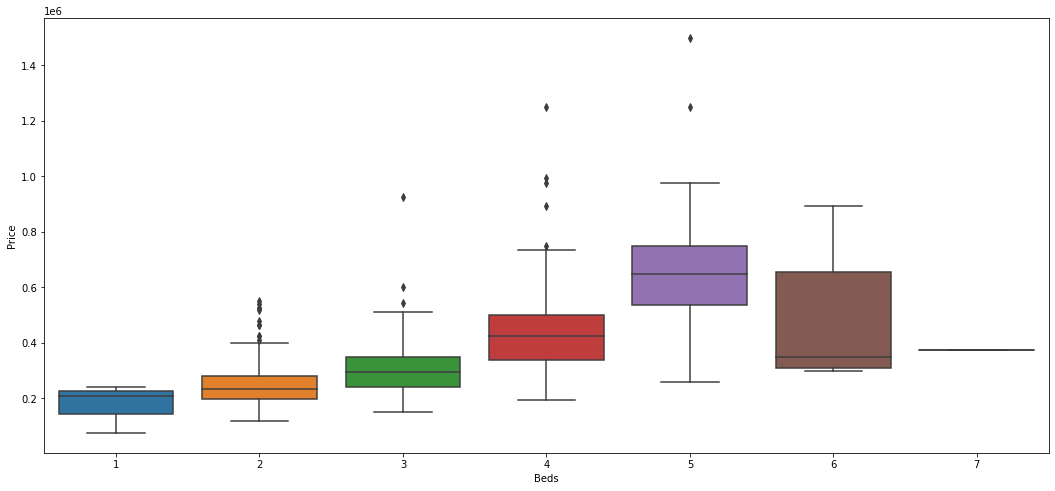

In [ ]:
fig = plt.subplots(figsize = (18,8))

sns.boxplot( x='Beds', y='Price', data=df_ready );

##We finish this File with success in Webscraping the data from the website and now the dataset is ready for next Stage - EDA, Modeling and Deploy